# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [25]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
import json
from datetime import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [8]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 627


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [9]:
# Set the API base URL
url = f'http://api.openweathermap.org/data/2.5/weather?'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}appid={weather_api_key}&q={city}&units=metric'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
    
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | busselton
Processing Record 2 of Set 1 | myitkyina
Processing Record 3 of Set 1 | karratha
Processing Record 4 of Set 1 | isiro
Processing Record 5 of Set 1 | naze
Processing Record 6 of Set 1 | launceston
Processing Record 7 of Set 1 | waddan
Processing Record 8 of Set 1 | dikson
Processing Record 9 of Set 1 | bredasdorp
Processing Record 10 of Set 1 | price
Processing Record 11 of Set 1 | kapaa
Processing Record 12 of Set 1 | vagur
Processing Record 13 of Set 1 | mataura
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | tabialan
City not found. Skipping...
Processing Record 16 of Set 1 | bluff
Processing Record 17 of Set 1 | leningradskiy
Processing Record 18 of Set 1 | angoche
Processing Record 19 of Set 1 | mayo
Processing Record 20 of Set 1 | sturgeon falls
Processing Record 21 of Set 1 | victoria
Processing Record 22 of Set 1 | tasiilaq
Processing Record 23 of Set

In [10]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          575
Lat           575
Lng           575
Max Temp      575
Humidity      575
Cloudiness    575
Wind Speed    575
Country       575
Date          575
dtype: int64

In [11]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,busselton,-33.6500,115.3333,17.38,75,100,5.91,AU,1680211208
1,myitkyina,25.3833,97.4000,17.29,65,1,1.08,MM,1680211208
2,karratha,-20.7377,116.8463,26.71,81,40,1.50,AU,1680211208
3,isiro,2.7739,27.6160,19.94,92,100,1.33,CD,1680211208
4,naze,28.3667,129.4833,17.51,94,100,4.11,JP,1680211208


In [12]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [13]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,busselton,-33.6500,115.3333,17.38,75,100,5.91,AU,1680211208
1,myitkyina,25.3833,97.4000,17.29,65,1,1.08,MM,1680211208
2,karratha,-20.7377,116.8463,26.71,81,40,1.50,AU,1680211208
3,isiro,2.7739,27.6160,19.94,92,100,1.33,CD,1680211208
4,naze,28.3667,129.4833,17.51,94,100,4.11,JP,1680211208


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

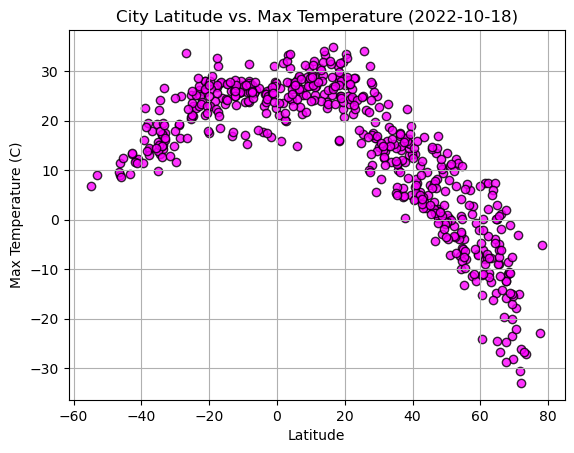

In [57]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values, alpha=.8, facecolors="magenta", edgecolors="black")

# Incorporate the other graph properties
plt.title('City Latitude vs. Max Temperature (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/latVsTemp.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

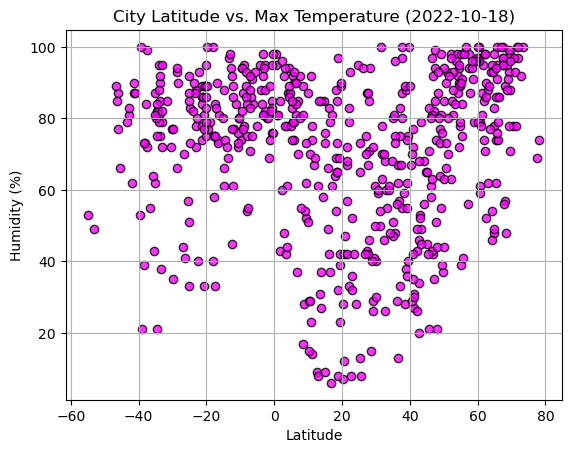

In [58]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values,y_values, alpha=.8, facecolors="magenta", edgecolors="black")

# Incorporate the other graph properties
plt.title('City Latitude vs. Max Temperature (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/latVsHumid.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

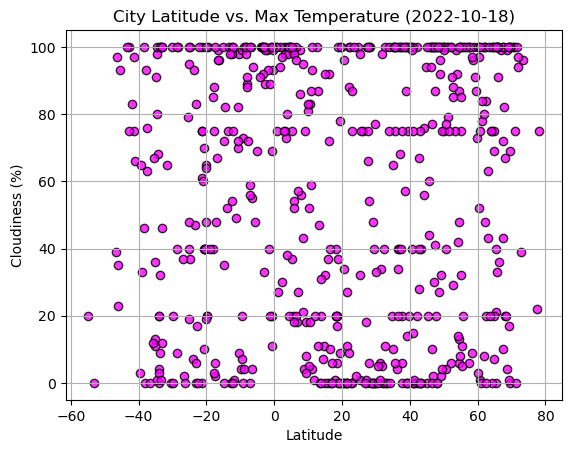

In [16]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values,y_values, alpha=.8, facecolors="magenta", edgecolors="black")

# Incorporate the other graph properties
plt.title('City Latitude vs. Max Temperature (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

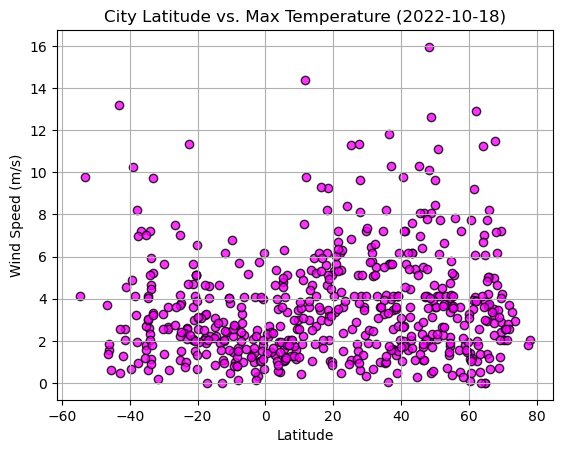

In [17]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values,y_values, alpha=.8, facecolors="magenta", edgecolors="black")

# Incorporate the other graph properties
plt.title('City Latitude vs. Max Temperature (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [44]:
# Define a function to create Linear Regression plots

def plot_linear_regression(x_values, y_values, title,x_label, y_label, line_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line
    line_eq = 'y=' + str(round(slope,2)) + 'x+' + str(round(intercept,2))
    plt.scatter(x_values,y_values, alpha=.8, facecolors="magenta", edgecolors="black")
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,line_coordinates,fontsize=15,color="red")
    date = datetime.date(datetime.now())
    plt.title(f'{title} Hemisphere City {x_label} vs. {y_label} {date}')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)

    print(f"The r-value is: {rvalue**2}")

In [32]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df['Lat'] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,myitkyina,25.3833,97.4000,17.29,65,1,1.08,MM,1680211208
3,isiro,2.7739,27.6160,19.94,92,100,1.33,CD,1680211208
4,naze,28.3667,129.4833,17.51,94,100,4.11,JP,1680211208
6,waddan,29.1614,16.1390,16.46,26,0,3.61,LY,1680211208
7,dikson,73.5069,80.5464,-27.11,100,96,2.94,RU,1680211208


In [33]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df['Lat'] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,busselton,-33.6500,115.3333,17.38,75,100,5.91,AU,1680211208
2,karratha,-20.7377,116.8463,26.71,81,40,1.50,AU,1680211208
5,launceston,-41.4500,147.1667,12.11,87,75,2.57,AU,1680211208
8,bredasdorp,-34.5322,20.0403,15.22,82,98,0.61,ZA,1680211038
12,mataura,-46.1927,168.8643,9.04,87,35,1.57,NZ,1680211210


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.8086503152014572


<function matplotlib.pyplot.show(close=None, block=None)>

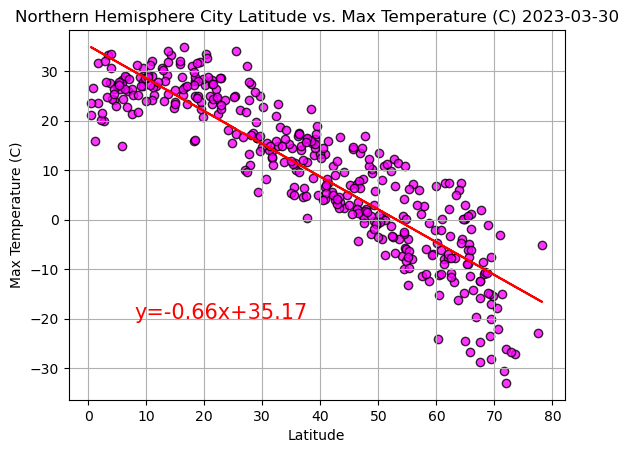

In [45]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

plot_linear_regression(x_values, y_values, 'Northern', 'Latitude', 'Max Temperature (C)',(8,-20))
plt.show


The r-value is: 0.514949712418272


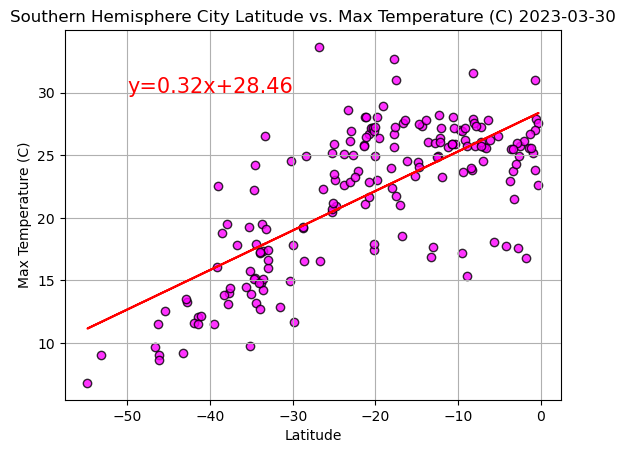

In [46]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

plot_linear_regression(x_values, y_values, 'Southern', 'Latitude', 'Max Temperature (C)',(-50,30))



**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.09712189134323217


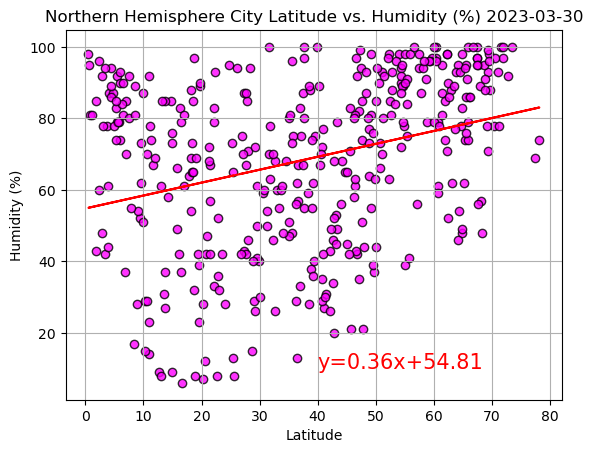

In [47]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

plot_linear_regression(x_values, y_values, 'Northern', 'Latitude', 'Humidity (%)',(40,10))

The r-value is: 0.05575380708338077


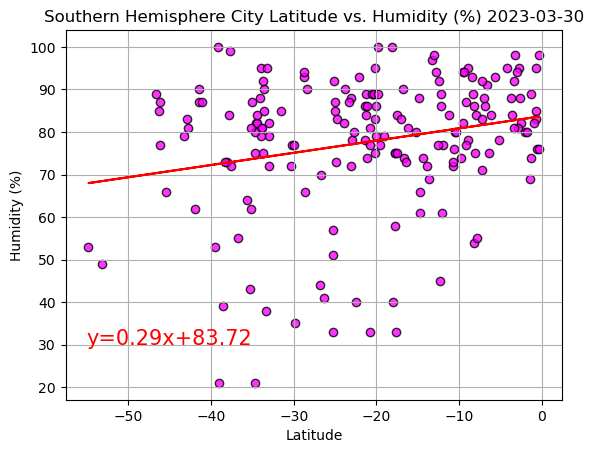

In [50]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

plot_linear_regression(x_values, y_values, 'Southern', 'Latitude', 'Humidity (%)',(-55,30))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.017000419273759466


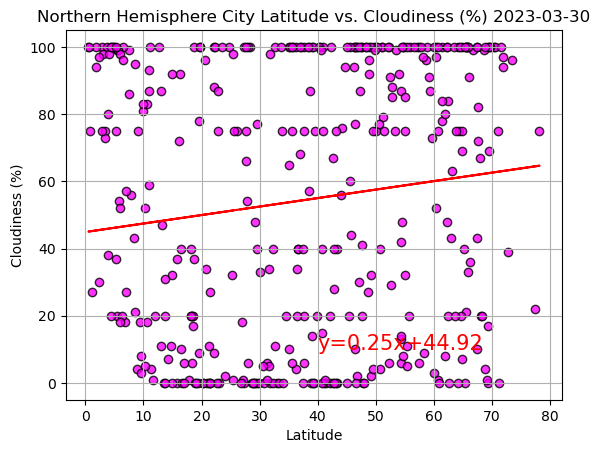

In [51]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

plot_linear_regression(x_values, y_values, 'Northern', 'Latitude', 'Cloudiness (%)',(40,10))

The r-value is: 0.04219317325909854


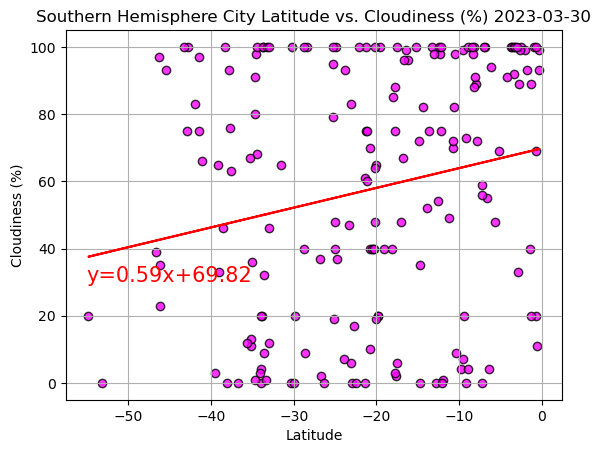

In [52]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

plot_linear_regression(x_values, y_values, 'Southern', 'Latitude', 'Cloudiness (%)',(-55,30))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0016470656523138079


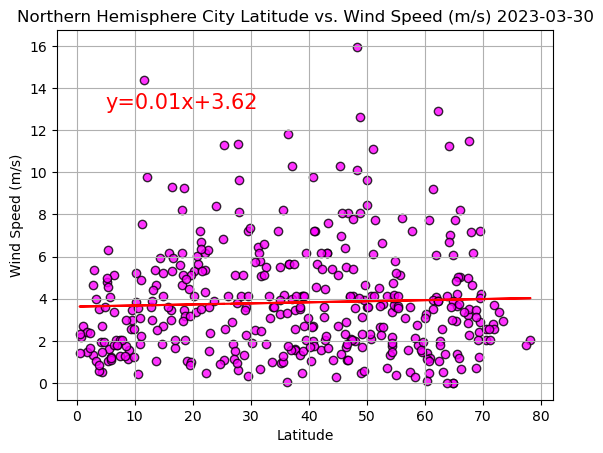

In [54]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

plot_linear_regression(x_values, y_values, 'Northern', 'Latitude', 'Wind Speed (m/s)',(5,13))

The r-value is: 0.07371884646438824


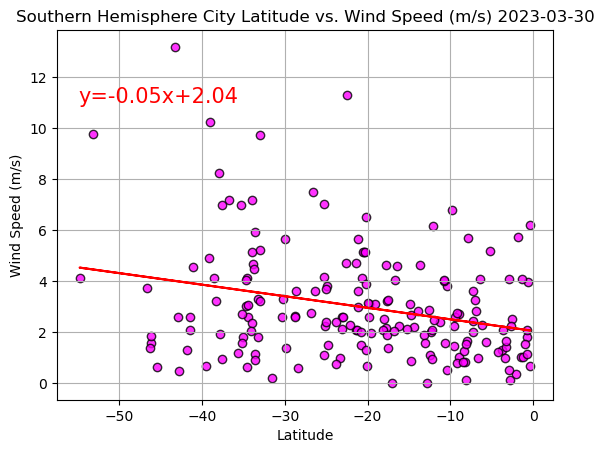

In [56]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

plot_linear_regression(x_values, y_values, 'Southern', 'Latitude', 'Wind Speed (m/s)',(-55,11))

**Discussion about the linear relationship:** YOUR RESPONSE HERE